<a href="https://colab.research.google.com/github/RAHULKISHORE93/Customer-Conversion-Prediction/blob/main/Customer_Conversion_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/drive/MyDrive/GUVI/Data/Customer_Conversion_Prediction-Project.csv")

In [3]:
#For displaying all columns
pd.set_option("display.max_columns",None)
df.head(6)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no


In [4]:
##For knowing Numnber of Rows & Columns
df.shape

(45211, 11)

In [5]:
#For finding nulls in each columns
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
#Datatypes checking & correction
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

#**Checking value counts in each particular column**

In [7]:
#for getting column headings
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [8]:
df["job"].value_counts

<bound method IndexOpsMixin.value_counts of 0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object>

In [9]:
df.job.nunique()

12

In [10]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [11]:
df.marital.nunique()

3

In [12]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [13]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [14]:
df.education_qual.nunique()

4

In [15]:
df.call_type.nunique()

3

In [16]:
df.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [17]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

# **Dropping Duplicates from dataframe**

In [18]:
df.shape

(45211, 11)

In [19]:
df=df.drop_duplicates()

In [20]:
df.shape

(45205, 11)

# **Data Visualization**

## **1) Distribution of the feature plot**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

### **i)Distribution of Categorical Data**

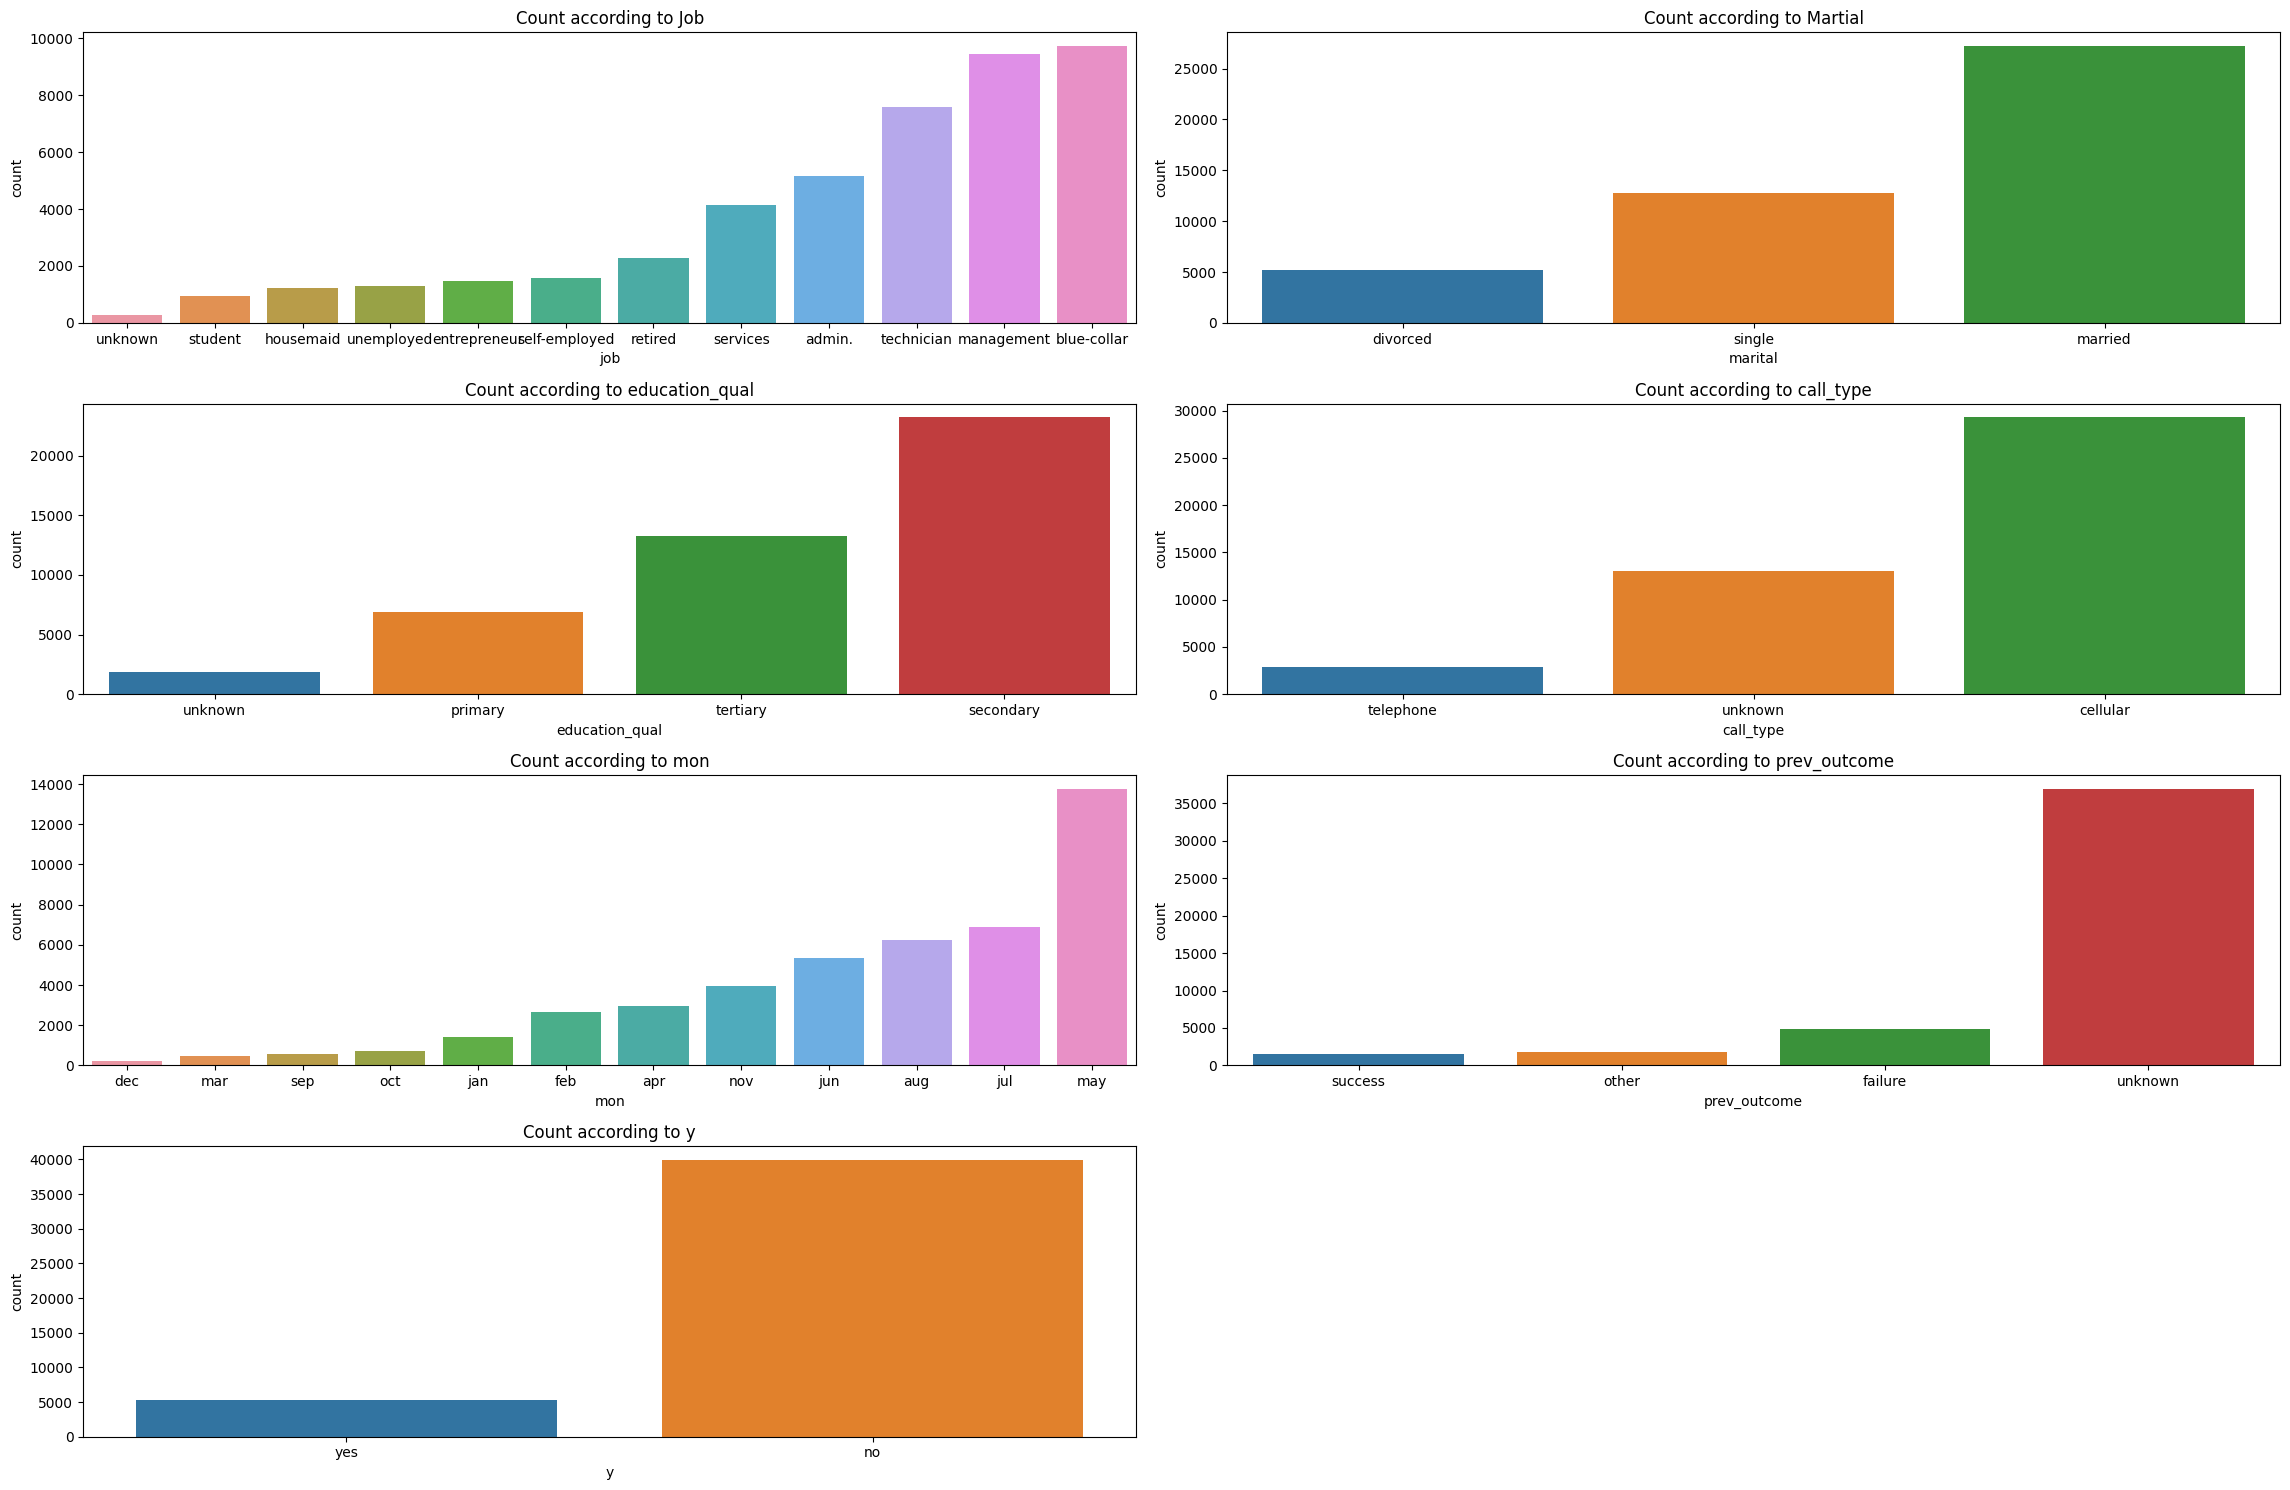

In [22]:
plt.figure(figsize=(23,15))

plt.subplot(421)
sns.countplot(x="job",data=df,order=df["job"].value_counts(ascending=True).index)
plt.title("Count according to Job")

plt.subplot(422)
sns.countplot(x="marital",data=df,order=df["marital"].value_counts(ascending=True).index)
plt.title("Count according to Martial")

plt.subplot(423)
sns.countplot(x="education_qual",data=df,order=df["education_qual"].value_counts(ascending=True).index)
plt.title("Count according to education_qual")

plt.subplot(424)
sns.countplot(x="call_type",data=df,order=df["call_type"].value_counts(ascending=True).index)
plt.title("Count according to call_type")

plt.subplot(425)
sns.countplot(x="mon",data=df,order=df["mon"].value_counts(ascending=True).index)
plt.title("Count according to mon")

plt.subplot(426)
sns.countplot(x="prev_outcome",data=df,order=df["prev_outcome"].value_counts(ascending=True).index)
plt.title("Count according to prev_outcome")

plt.subplot(427)
sns.countplot(x="y",data=df,order=df["y"].value_counts(ascending=True).index)
plt.title("Count according to y")

plt.tight_layout()

### **ii)Distribution of Continuous Data**

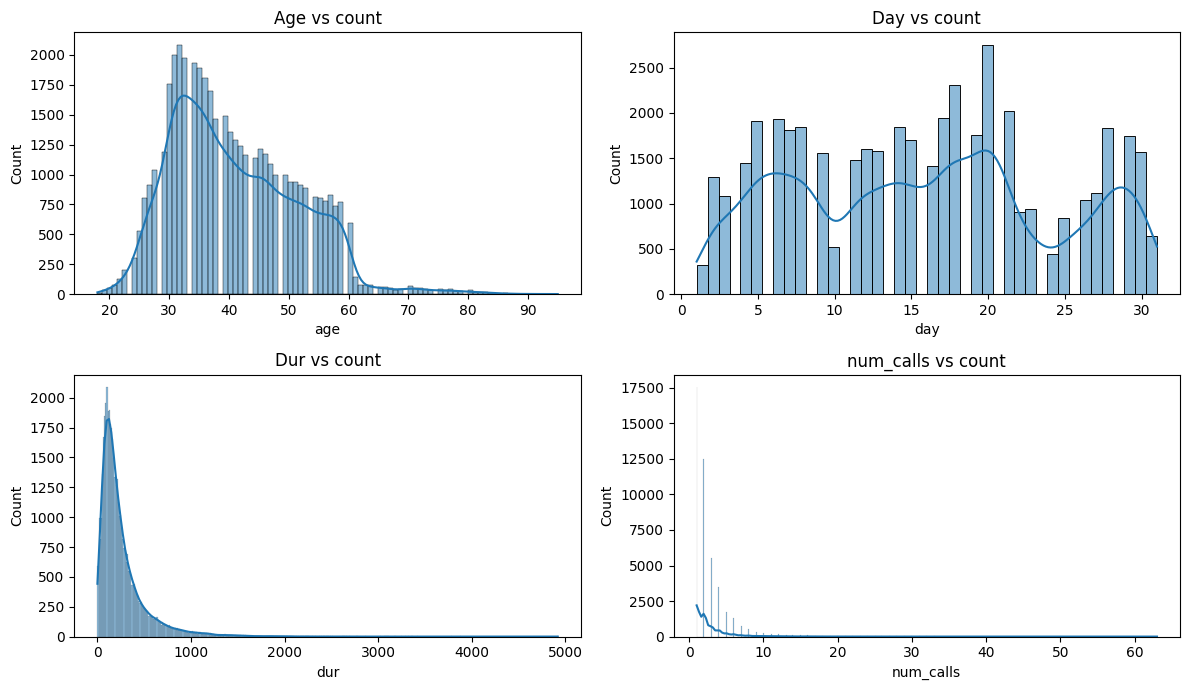

In [23]:
plt.figure(figsize=(12,7))

plt.subplot(221)
sns.histplot(data=df,x="age",kde=True)
plt.title("Age vs count")

plt.subplot(222)
sns.histplot(data=df,x="day",kde=True)
plt.title("Day vs count")

plt.subplot(223)
sns.histplot(data=df,x="dur",kde=True)
plt.title("Dur vs count")

plt.subplot(224)
sns.histplot(data=df,x="num_calls",kde=True)
plt.title("num_calls vs count")

plt.tight_layout()

##**2)Feature VS The Target Plot**

###**a)Categorical feature vs Categorical Target**

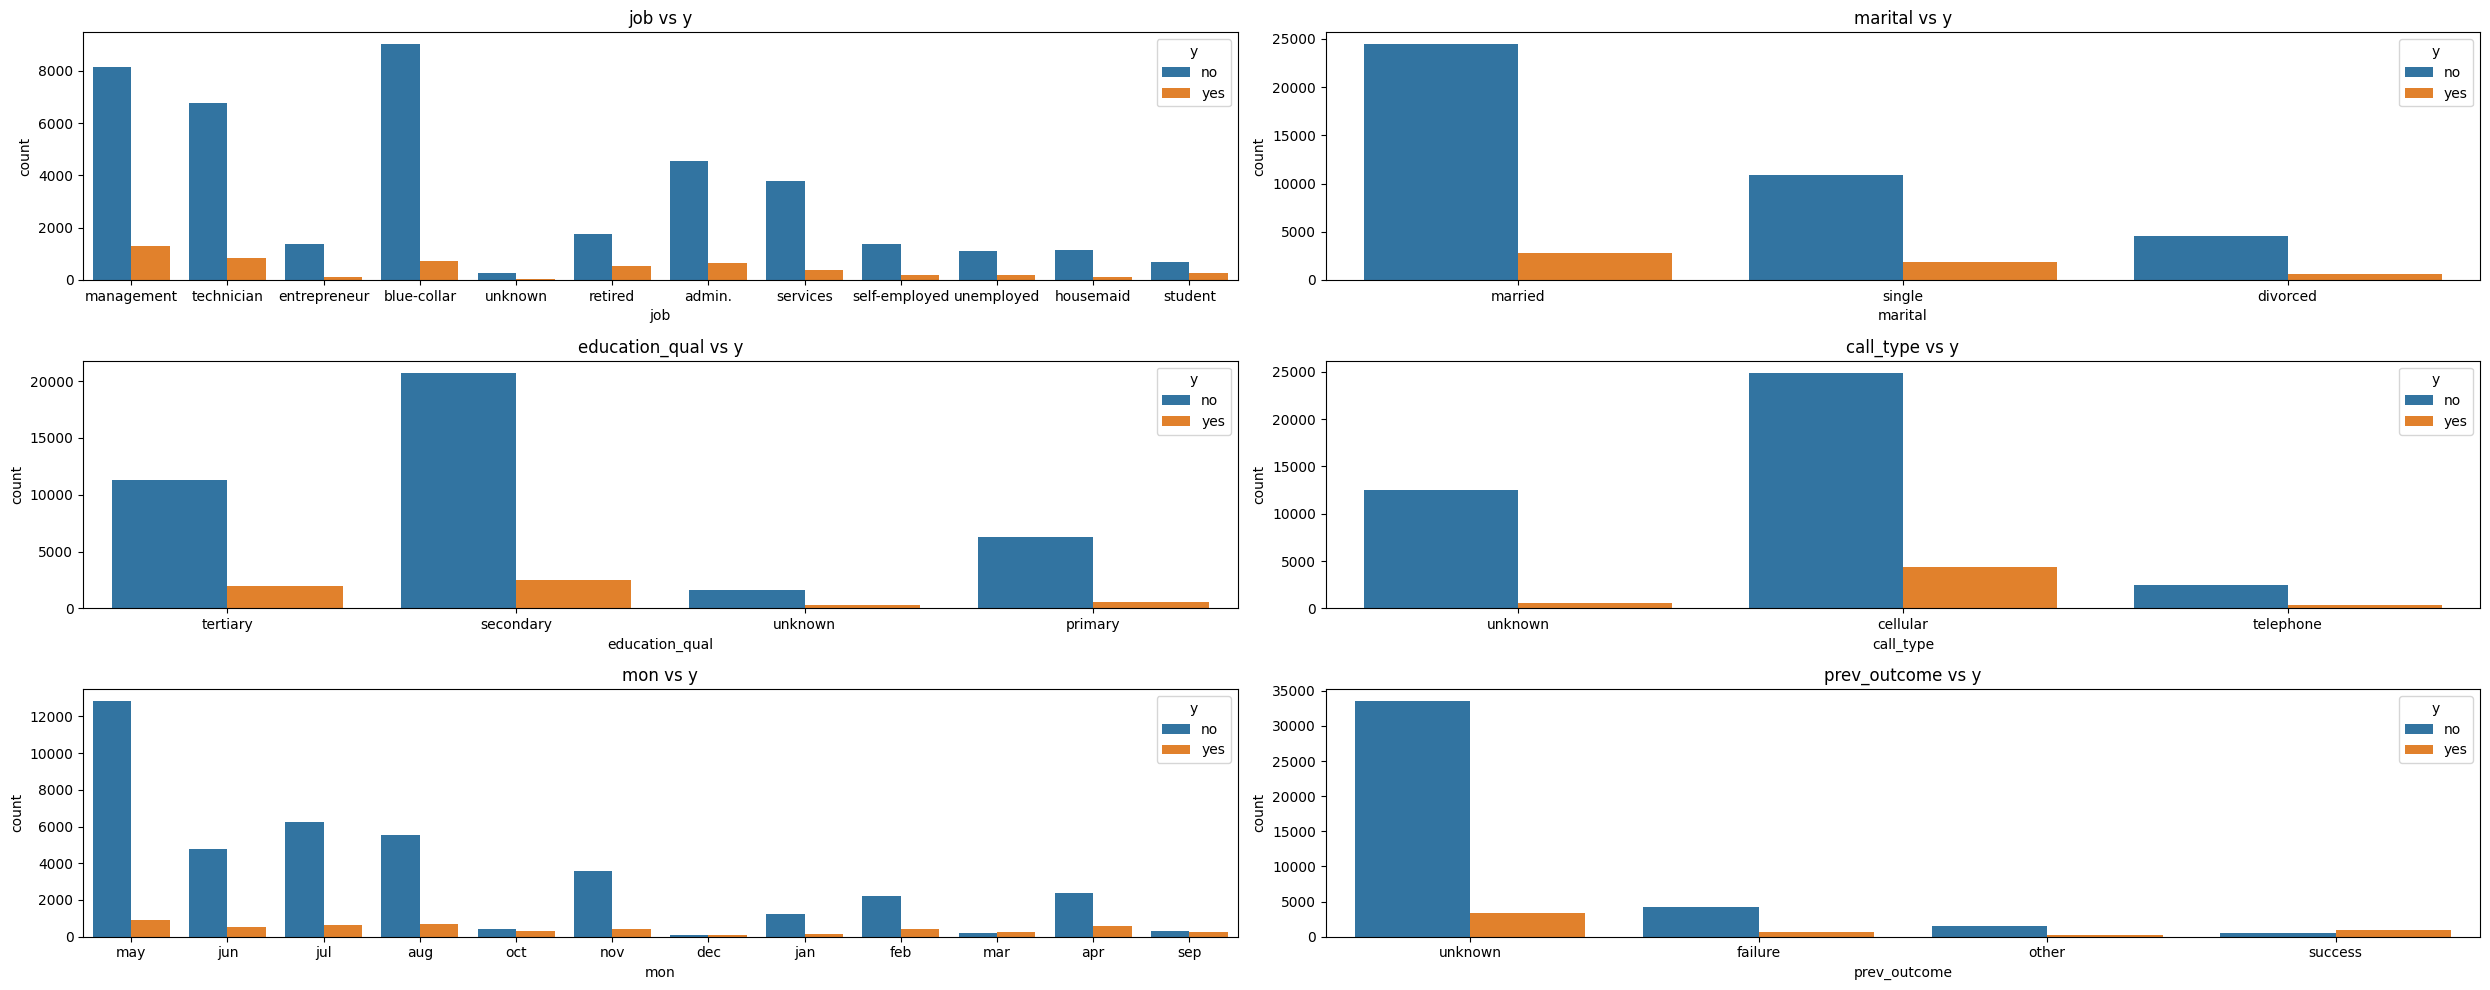

In [24]:
plt.figure(figsize=(25,10))

plt.subplot(321)
sns.countplot(x="job",hue="y",data=df)
plt.title("job vs y")

plt.subplot(322)
sns.countplot(x="marital",hue="y",data=df)
plt.title("marital vs y")

plt.subplot(323)
sns.countplot(x="education_qual",hue="y",data=df)
plt.title("education_qual vs y")

plt.subplot(324)
sns.countplot(x="call_type",hue="y",data=df)
plt.title("call_type vs y")

plt.subplot(325)
sns.countplot(x="mon",hue="y",data=df)
plt.title("mon vs y")

plt.subplot(326)
sns.countplot(x="prev_outcome",hue="y",data=df)
plt.title("prev_outcome vs y")

plt.tight_layout()

###**b)Continuous feature vs Categorical Target**

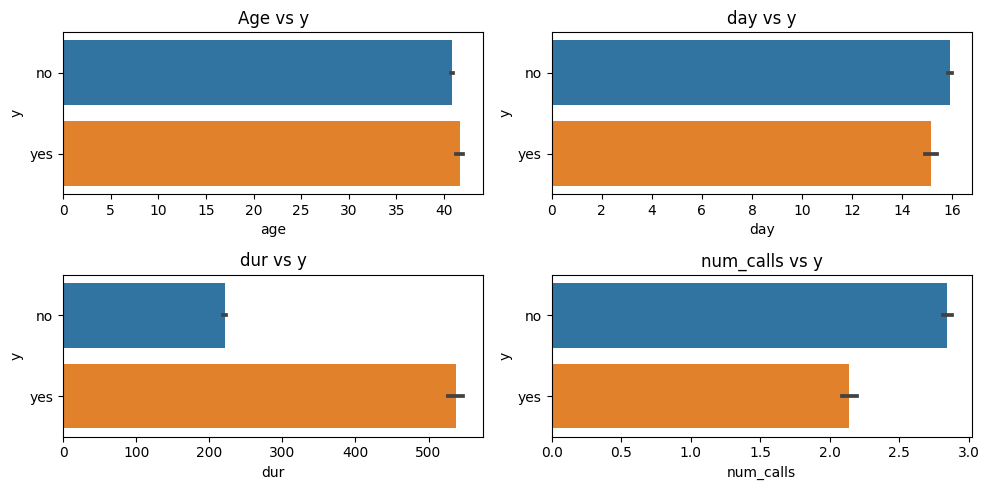

In [25]:
plt.figure(figsize=(10,5))

plt.subplot(221)
sns.barplot(x="age",y="y",data=df)
plt.title("Age vs y")

plt.subplot(222)
sns.barplot(x="day",y="y",data=df)
plt.title("day vs y")

plt.subplot(223)
sns.barplot(x="dur",y="y",data=df)
plt.title("dur vs y")

plt.subplot(224)
sns.barplot(x="num_calls",y="y",data=df)
plt.title("num_calls vs y")

plt.tight_layout()

# **Encoding Categorical Variables**

In [26]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [27]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [28]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [29]:
#One Hot Encoding
df = pd.get_dummies(df,columns= ["job","marital","education_qual","call_type","mon","prev_outcome"])

In [30]:
df.head

<bound method NDFrame.head of        age  day   dur  num_calls    y  job_admin.  job_blue-collar  \
0       58    5   261          1   no           0                0   
1       44    5   151          1   no           0                0   
2       33    5    76          1   no           0                0   
3       47    5    92          1   no           0                1   
4       33    5   198          1   no           0                0   
...    ...  ...   ...        ...  ...         ...              ...   
45206   51   17   977          3  yes           0                0   
45207   71   17   456          2  yes           0                0   
45208   72   17  1127          5  yes           0                0   
45209   57   17   508          4   no           0                1   
45210   37   17   361          2   no           0                0   

       job_entrepreneur  job_housemaid  job_management  job_retired  \
0                     0              0               1    

In [31]:
#Label Encoding or Integer Encoding
df["y"] = df["y"].map({'no':0, 'yes':1})

In [32]:
df.head

<bound method NDFrame.head of        age  day   dur  num_calls  y  job_admin.  job_blue-collar  \
0       58    5   261          1  0           0                0   
1       44    5   151          1  0           0                0   
2       33    5    76          1  0           0                0   
3       47    5    92          1  0           0                1   
4       33    5   198          1  0           0                0   
...    ...  ...   ...        ... ..         ...              ...   
45206   51   17   977          3  1           0                0   
45207   71   17   456          2  1           0                0   
45208   72   17  1127          5  1           0                0   
45209   57   17   508          4  0           0                1   
45210   37   17   361          2  0           0                0   

       job_entrepreneur  job_housemaid  job_management  job_retired  \
0                     0              0               1            0   
1          

# **Splitting the data into Train & Test data**

In [33]:
from sklearn.model_selection import train_test_split
x = df.drop(["y"],axis=1)
y = df["y"]

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=222)

In [35]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(36164, 42) (9041, 42) (36164,) (9041,)


# **Building Machine Learning Model**

## **a) Logistic Regression**

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [37]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
prediction_LR = LR.predict(x_train)
print("Accuracy of model LR: ",accuracy_score(y_train,prediction_LR))
print("Roc Auc Score LR: ",roc_auc_score(y_train,prediction_LR))

Accuracy of model LR:  0.9006470523172215
Roc Auc Score LR:  0.655872194680124


In [39]:
prediction_LR = LR.predict(x_test)
print("Accuracy of model LR: ",accuracy_score(y_test,prediction_LR))
print("Roc Auc Score LR: ",roc_auc_score(y_test,prediction_LR))

Accuracy of model LR:  0.9016701692290676
Roc Auc Score LR:  0.657349490540745


## **b)K Nearest Neighbors(KNN)**

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
Knn = KNeighborsClassifier(n_neighbors=3)
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
prediction_Knn = Knn.predict(x_train)
print("Accuracy of model KNN: ",accuracy_score(y_train,prediction_Knn))
print("Roc Auc Score KNN: ",roc_auc_score(y_train,prediction_Knn))

Accuracy of model KNN:  0.9214135604468532
Roc Auc Score KNN:  0.7257586629083347


In [43]:
prediction_Knn = Knn.predict(x_test)
print("Accuracy of model KNN: ",accuracy_score(y_test,prediction_Knn))
print("Roc Auc Score KNN: ",roc_auc_score(y_test,prediction_Knn))

Accuracy of model KNN:  0.8698152859196991
Roc Auc Score KNN:  0.5942159224457833


## **c)Decision Tree**

In [44]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

In [45]:
DTC= DecisionTreeClassifier(max_depth=8)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [46]:
prediction_DTC = DTC.predict(x_train)
print("Accuracy of model DTC: ",accuracy_score(y_train,prediction_DTC))
print("Roc Auc Score DTC: ",roc_auc_score(y_train,prediction_DTC))

Accuracy of model DTC:  0.9148324300409246
Roc Auc Score DTC:  0.7175213365332991


In [47]:
prediction_DTC = DTC.predict(x_test)
print("Accuracy of model DTC: ",accuracy_score(y_test,prediction_DTC))
print("Roc Auc Score DTC: ",roc_auc_score(y_test,prediction_DTC))

Accuracy of model DTC:  0.9011171330605021
Roc Auc Score DTC:  0.6877830773190762


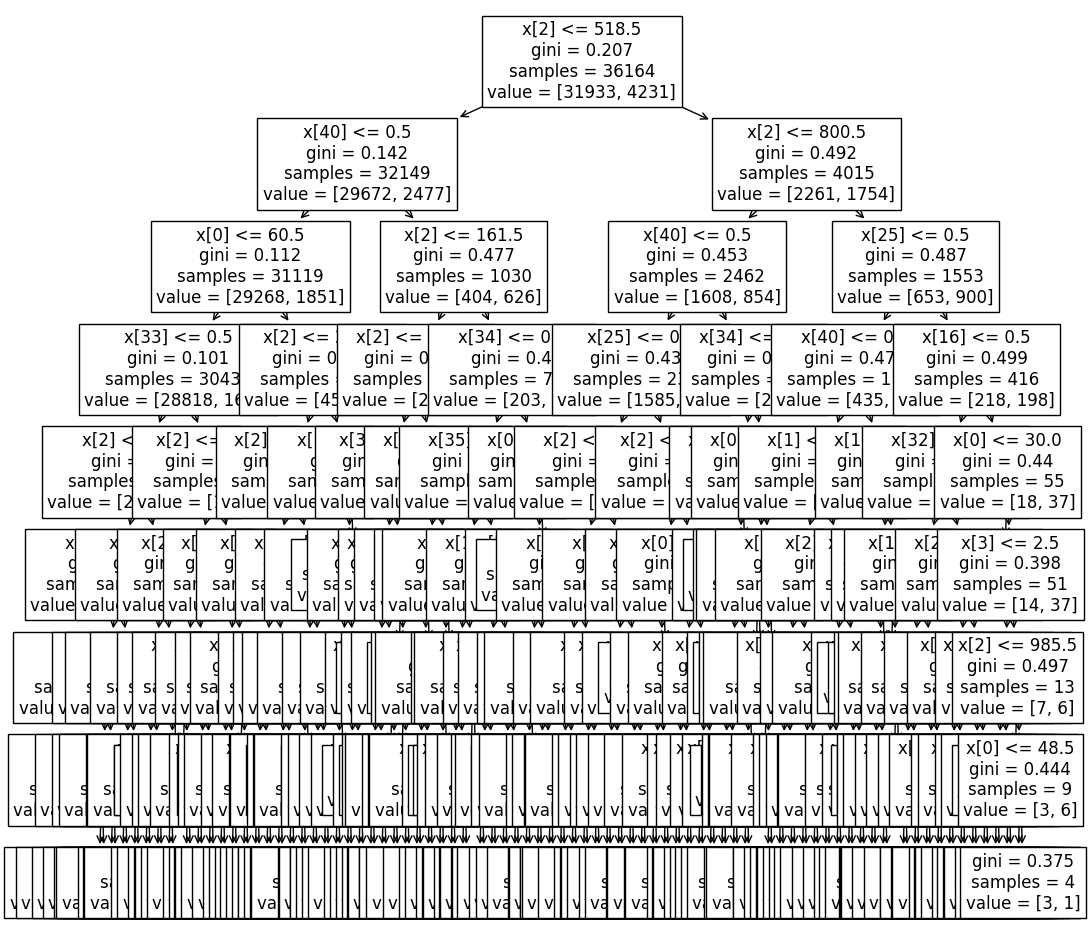

In [48]:
plt.figure(figsize=(12,12))
tree.plot_tree(DTC,fontsize=(12))
plt.show()

## **d) SVM**

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.datasets import make_blobs

In [50]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [51]:
prediction_SVC = model.predict(x_train)
print("Accuracy of model SVC: ",accuracy_score(y_train,prediction_SVC))
print("Roc Auc Score SVC: ",roc_auc_score(y_train,prediction_SVC))
print("Classification Report: ",classification_report(y_train,prediction_SVC))

Accuracy of model SVC:  0.8895033735206282
Roc Auc Score SVC:  0.5768771374993124
Classification Report:                precision    recall  f1-score   support

           0       0.90      0.98      0.94     31933
           1       0.60      0.17      0.26      4231

    accuracy                           0.89     36164
   macro avg       0.75      0.58      0.60     36164
weighted avg       0.86      0.89      0.86     36164



In [52]:
prediction_SVC = model.predict(x_test)
print("Accuracy of model SVC: ",accuracy_score(y_test,prediction_SVC))
print("Roc Auc Score SVC: ",roc_auc_score(y_test,prediction_SVC))
print("Classification Report: ",classification_report(y_test,prediction_SVC))

Accuracy of model SVC:  0.8876230505475058
Roc Auc Score SVC:  0.5669937913908265
Classification Report:                precision    recall  f1-score   support

           0       0.90      0.99      0.94      7983
           1       0.58      0.15      0.24      1058

    accuracy                           0.89      9041
   macro avg       0.74      0.57      0.59      9041
weighted avg       0.86      0.89      0.86      9041



## **e)Random Forest**

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
RFC = RandomForestClassifier(max_depth=20)
RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=20)

In [55]:
prediction_RFC = RFC.predict(x_train)
print("Accuracy of model RFC: ",accuracy_score(y_train,prediction_RFC))
print("Roc Auc Score RFC: ",roc_auc_score(y_train,prediction_RFC))


Accuracy of model RFC:  0.9766895254949673
Roc Auc Score RFC:  0.9017108898451951


In [56]:
prediction_RFC = RFC.predict(x_test)
print("Accuracy of model RFC: ",accuracy_score(y_test,prediction_RFC))
print("Roc Auc Score RFC: ",roc_auc_score(y_test,prediction_RFC))


Accuracy of model RFC:  0.904767171773034
Roc Auc Score RFC:  0.6824707489236935


## **f)Gradient Boosting Classifier**

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
GBC = GradientBoostingClassifier(learning_rate=0.1)
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [59]:
prediction_GBC = GBC.predict(x_train)
print("Accuracy of model GBC: ",accuracy_score(y_train,prediction_GBC))
print("Roc Auc Score GBC: ",roc_auc_score(y_train,prediction_GBC))
print("Classification Report: ",classification_report(y_train,prediction_GBC))

Accuracy of model GBC:  0.9101869262249751
Roc Auc Score GBC:  0.7006408840691716
Classification Report:                precision    recall  f1-score   support

           0       0.93      0.97      0.95     31933
           1       0.69      0.43      0.53      4231

    accuracy                           0.91     36164
   macro avg       0.81      0.70      0.74     36164
weighted avg       0.90      0.91      0.90     36164



In [60]:
prediction_GBC = GBC.predict(x_test)
print("Accuracy of model GBC: ",accuracy_score(y_test,prediction_GBC))
print("Roc Auc Score GBC: ",roc_auc_score(y_test,prediction_GBC))
print("Classification Report: ",classification_report(y_test,prediction_GBC))

Accuracy of model GBC:  0.9085278177192788
Roc Auc Score GBC:  0.7001786286406819
Classification Report:                precision    recall  f1-score   support

           0       0.93      0.97      0.95      7983
           1       0.67      0.43      0.52      1058

    accuracy                           0.91      9041
   macro avg       0.80      0.70      0.74      9041
weighted avg       0.90      0.91      0.90      9041



#Feature Importance

In [61]:
importance = abs(LR.coef_[0])

# print the feature importance
for i, v in enumerate(importance):
    print('Feature {}: {:.5f}'.format(x_train.columns[i], v))

Feature age: 0.00603
Feature day: 0.00534
Feature dur: 0.00405
Feature num_calls: 0.09625
Feature job_admin.: 0.01496
Feature job_blue-collar: 0.50868
Feature job_entrepreneur: 0.27714
Feature job_housemaid: 0.24068
Feature job_management: 0.09894
Feature job_retired: 0.59446
Feature job_self-employed: 0.18753
Feature job_services: 0.38905
Feature job_student: 0.40238
Feature job_technician: 0.25771
Feature job_unemployed: 0.03253
Feature job_unknown: 0.00673
Feature marital_divorced: 0.41848
Feature marital_married: 0.37527
Feature marital_single: 0.20988
Feature education_qual_primary: 0.54496
Feature education_qual_secondary: 0.33974
Feature education_qual_tertiary: 0.08843
Feature education_qual_unknown: 0.03051
Feature call_type_cellular: 0.26953
Feature call_type_telephone: 0.08136
Feature call_type_unknown: 1.35453
Feature mon_apr: 0.15102
Feature mon_aug: 0.50518
Feature mon_dec: 0.23491
Feature mon_feb: 0.23420
Feature mon_jan: 0.67352
Feature mon_jul: 0.92216
Feature mon_jun: